In [2]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre:

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



Solución aproximada: [ 1.09266453  2.84712066 -1.03976234  1.03324954]
Número de iteraciones: 20
Solcuión con la.solve: [ 1.09266453  2.84712066 -1.03976234  1.03324954]
Las soluciones coinciden


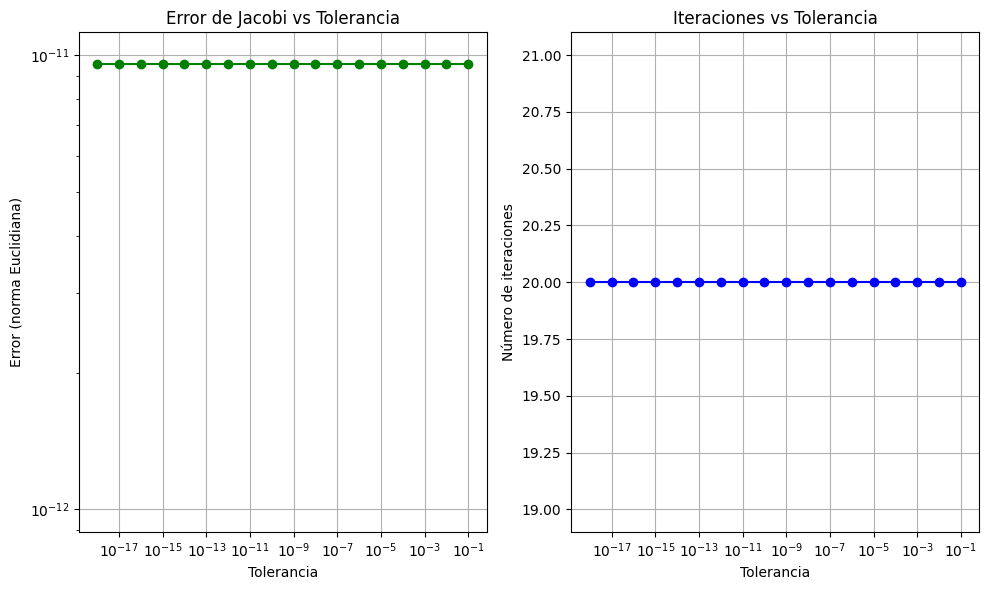

In [38]:
# Índice a
def Jacobi(A, b, tol=1e-10, max_iter=1000):
  '''
  Resuelve Ax = b por medio del método Jacobi. Algoritmo iterativo
  Entradas:
  - A : matriz cuadrada no singular -> ndarray
  - b : vector de términos independientes -> ndarray
  - tol : toleracia para comprobar convergencia.
  - max_iter: número másximo de iteraciones.

  Retorna:
  - x : solución aproximada -> ndarray
  - iter : número de iteraciones realizadas.
  '''
  n = len(b)
  x = np.zeros_like(b, dtype=float) # Vector inicial
  x_new = np.zeros_like(b, dtype=float)

  for k in range(1, max_iter + 1):
    for i in range(n):
      suma = 0.
      for j in range(n):
        if j != i:
          suma += A[i, j] * x[j]
      x_new[i] = (b[i] - suma) / A[i, i]

    # Convergencia
    if la.norm(x_new - x) < tol:
      return x_new, k

    x = x_new.copy() # Actualizar para la siguiente iteración
  return x, iter

# Ìndice b
A = np.array([[10, -1, 2, 0],
              [-2, 11, 0, -4],
              [3, -1, 10, -1],
              [0, 2, -1, 8]], dtype=float)

b = np.array([6, 25, -11, 15], dtype=float)

solucion, iteraciones = Jacobi(A, b)

print("Solución aproximada:", solucion)
print("Número de iteraciones:", iteraciones)

# índice c
sol = la.solve(A, b)
print("Solcuión con la.solve:", sol)
print("Las soluciones coinciden")

# Tolerancias
tols = np.logspace(-18, -1, 18)
errores = []
iteraciones = []

for tol in tols:
  sol_jacobi, iters = Jacobi(A, b)
  error = la.norm(sol_jacobi - sol)
  errores.append(error)
  iteraciones.append(iters)

# Gráfico del error
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.loglog(tols, errores, 'g-o')
plt.xlabel('Tolerancia')
plt.ylabel('Error (norma Euclidiana)')
plt.title('Error de Jacobi vs Tolerancia')
plt.grid()

# Gráfico del número de iteraciones
plt.subplot(1,2,2)
plt.semilogx(tols, iteraciones, 'b-o')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Iteraciones vs Tolerancia')
plt.grid()

plt.tight_layout()
plt.show()


# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


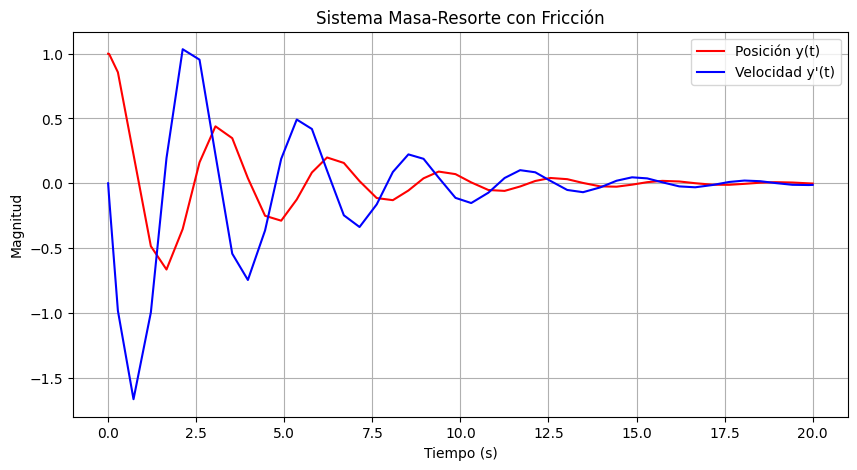

In [24]:
# índice a
def masa_resorte(t, Y, m, c, k):
  '''
  Modelo masa resorte con fricción. Dinámica gobernada por la ecuación diferencial:
  my''(t) + cy'(t) + ky(t) = 0

  Entradas:
  - m : masa del objeto.
  - c : coeficiente de fricción.
  - k : constante de resorte.
  - t : tiempo (independiente).
  - Y : vector de estado [y1, y2]

  Retorna:
  -
  '''
  y1, y2 = Y
  dy1dt = y2
  dy2dt = -(c/m) * y2 - (k/m) * y1

  return [dy1dt, dy2dt]

# Índice b
# Parámetros dados
m = 1.   # kg
k = 4.   # N/m
c = 0.5  # N*s/m

# Condición inicial
y0 = [1., 0.]

# Intervalo de tiempo
t_inter = (0, 20)
t_eval = np.linspace(t_inter[0], t_inter[1], 500)

# Resolver
sol = solve_ivp(masa_resorte, t_inter, y0, method='RK45', args=(m, c, k))

# Graficar resultados
plt.figure(figsize=(10,5))

# Posición
plt.plot(sol.t, sol.y[0], 'r-', label='Posición y(t)')
# Velocidad
plt.plot(sol.t, sol.y[1], 'b-', label='Velocidad y\'(t)')

plt.title('Sistema Masa-Resorte con Fricción')
plt.xlabel('Tiempo (s)')
plt.ylabel('Magnitud')
plt.grid()
plt.legend()
plt.show()

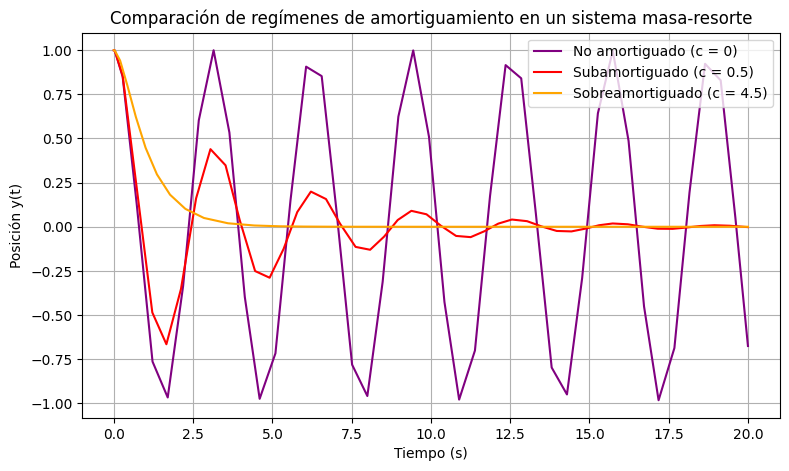

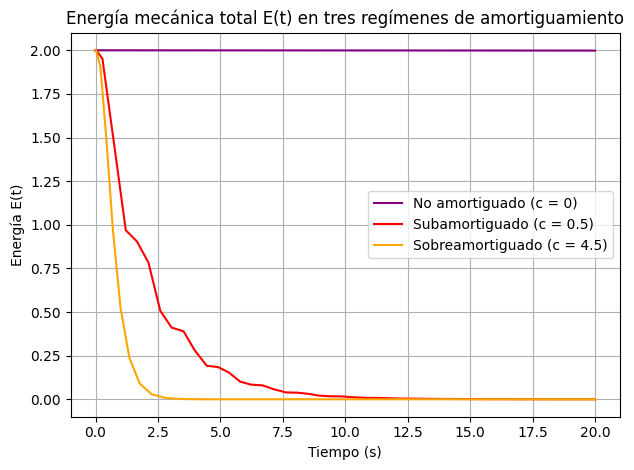

In [31]:
# Índice c
# Diferentes casos
casos = [
    ("No amortiguado (c = 0)", 0.0, 'purple'),
    ("Subamortiguado (c = 0.5)", 0.5, 'red'),
    ("Sobreamortiguado (c = 4.5)", 4.5, 'orange')]

plt.figure(figsize=(9, 5))

for label, c, color in casos:
    sol = solve_ivp(masa_resorte, t_inter, y0, method='RK45', args=(m, c, k))
    plt.plot(sol.t, sol.y[0], label=label, color=color)

plt.title('Comparación de regímenes de amortiguamiento en un sistema masa-resorte')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición y(t)')
plt.grid()
plt.legend()
plt.show()

# Índice d
for regimenes, c, color in casos:
  sol = solve_ivp(masa_resorte, t_inter, y0, method='RK45', args=(m, c, k))
  y = sol.y[0]
  v = sol.y[1]
  E = (0.5 * m * (v**2)) + (0.5 * k * (y**2)) # E(t)
  plt.plot(sol.t, E, label=regimenes, color=color)

plt.title("Energía mecánica total E(t) en tres regímenes de amortiguamiento")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía E(t)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Análisis:

Si el coeficiene de fricción (c) es 0, la energía va a ser constante, ya que la energía se conservará en el sistema.

Si el coeficiente de fricción es más grande, la energía caerá más rápido, ya que habrá un "desgaste" de energía en el sistema, es decir, no será conservativo y su energía se transformará.

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [39]:
n = 5 # Tamaño de la matriz
num_matrices = 1000

# Contadores de errores para cada caso
error_det = 0
error_tr = 0

for i in range(num_matrices):
  A = np.random.uniform(-5, 10, (n, n))

  det_A = la.det(A)
  tr_A = np.trace(A)

  # Autovalores
  autovals = la.eigvals(A)

  det_auto = np.prod(autovals)
  tr_auto = np.sum(autovals)

  # Errores absolutos
  erabs_det = abs(det_A - det_auto)
  erabs_tr = abs(tr_A - tr_auto)

  # Error máximo
  error_det = max(error_det, erabs_det)
  error_tr = max(error_tr, erabs_tr)

print('Máximo error det:', error_det)
print('Máximos error traza:', error_tr)

Máximo error det: 3.4924596548080444e-10
Máximos error traza: 7.105427357601002e-14
